In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Read Data

Multual_Funds = yf.download('TRGRX ADLVX CISMX CFSMX GISYX WTIFX AIAFX BGAIX WAMCX CIPIX GLFOX RYPMX FGILX AASCX FEGIX SGGDX JCMAX VBINX WWWFX BESIX ABALX GEDTX SSSFX WIIFX OEGYX BCSFX FSBBX THISX PVIVX SIUSX', start ='2016-10-01',end ='2022-10-01')

[*********************100%***********************]  30 of 30 completed


In [3]:
# Closing price

Multual_Funds = Multual_Funds['Adj Close'] 
print(Multual_Funds)

                AASCX      ABALX      ADLVX      AIAFX      BCSFX      BESIX  \
Date                                                                           
2016-10-03  14.108392  18.808699        NaN  14.172220  11.083698  13.647244   
2016-10-04  14.049714  18.733255        NaN  14.060504  11.092857  13.647244   
2016-10-05  14.154028  18.801157        NaN  14.044543  11.092857  13.672595   
2016-10-06  14.147511  18.801157        NaN  13.988688  10.982936  13.630343   
2016-10-07  14.062756  18.786064        NaN  13.868988  10.927977  13.579643   
...               ...        ...        ...        ...        ...        ...   
2022-09-26  24.969999  26.950001  23.160000  19.730000  16.540001  17.190001   
2022-09-27  24.969999  26.860001  23.080000  19.570000  16.400000  17.270000   
2022-09-28  25.620001  27.360001  23.480000  19.920000  16.590000  17.340000   
2022-09-29  25.170000  27.020000  23.110001  19.510000  16.490000  17.150000   
2022-09-30  24.940001  26.790001  22.959

### Calculating the return

In [4]:
# Log of percentage change of all multual funds in the list

log_return = np.log(Multual_Funds / Multual_Funds.shift(1))


/Users/lexicai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [5]:
log_return.tail().round(3)

,AASCX,ABALX,ADLVX,AIAFX,BCSFX,BESIX,BGAIX,CFSMX,CIPIX,CISMX,...,SGGDX,SIUSX,SSSFX,THISX,TRGRX,VBINX,WAMCX,WIIFX,WTIFX,WWWFX
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26,-0.016,-0.014,-0.012,-0.027,-0.007,-0.030,-0.010,-0.015,-0.007,-0.015,...,-0.024,-0.012,-0.008,-0.012,-0.027,-0.012,-0.008,-0.005,-0.005,-0.002
2022-09-27,0.000,-0.003,-0.003,-0.008,-0.009,0.005,0.010,-0.004,-0.003,-0.004,...,0.001,-0.008,0.003,0.004,-0.015,-0.002,0.011,-0.007,-0.007,0.007
2022-09-28,0.026,0.018,0.017,0.018,0.012,0.004,0.035,0.015,0.025,0.015,...,0.052,0.011,0.025,0.028,0.020,0.018,0.040,0.020,0.020,0.020
2022-09-29,-0.018,-0.013,-0.016,-0.021,-0.006,-0.011,-0.029,-0.019,-0.011,-0.019,...,0.006,-0.006,-0.017,-0.009,-0.020,-0.015,-0.027,-0.017,-0.016,-0.006
2022-09-30,-0.009,-0.009,-0.007,-0.008,0.012,0.007,0.000,-0.003,-0.010,-0.003,...,0.015,0.000,-0.006,-0.010,0.012,-0.009,-0.008,0.000,-0.001,-0.000


### Calculating the Mean and Standard deviation

In [6]:
### Calculating the correlation and covariance

Correlation_matrix = log_return.corr()

In [7]:
pd.options.display.max_columns = None

In [8]:
Correlation_matrix

,AASCX,ABALX,ADLVX,AIAFX,BCSFX,BESIX,BGAIX,CFSMX,CIPIX,CISMX,FEGIX,FGILX,FSBBX,GEDTX,GISYX,GLFOX,JCMAX,OEGYX,PVIVX,RYPMX,SGGDX,SIUSX,SSSFX,THISX,TRGRX,VBINX,WAMCX,WIIFX,WTIFX,WWWFX
AASCX,1.000000,0.897190,0.849947,0.833064,0.571685,0.599735,0.710853,0.899642,0.907514,0.899771,0.221934,0.891367,0.891919,0.678083,0.771486,0.690775,0.906558,0.849969,0.866141,0.287642,0.222485,-0.063386,0.898930,0.762290,0.780648,0.910547,0.838353,0.720693,0.720190,0.543420
ABALX,0.897190,1.000000,0.826838,0.892676,0.601633,0.675750,0.732398,0.835360,0.903401,0.835386,0.266249,0.962283,0.960237,0.753806,0.826589,0.750853,0.901616,0.870066,0.797863,0.310445,0.266714,0.025114,0.830259,0.822384,0.808777,0.977053,0.807551,0.771255,0.771253,0.548503
ADLVX,0.849947,0.826838,1.000000,0.841425,0.496663,0.613975,0.539715,0.873433,0.779690,0.873993,0.185986,0.843186,0.826751,0.640083,0.704756,0.731208,0.817246,0.681223,0.805702,0.253440,0.186182,-0.107332,0.854868,0.651204,0.795940,0.818687,0.697598,0.697870,0.697990,0.520034
AIAFX,0.833064,0.892676,0.841425,1.000000,0.599690,0.709249,0.608208,0.825539,0.806544,0.825951,0.292481,0.915274,0.903347,0.740408,0.799725,0.843879,0.832057,0.747670,0.733951,0.332205,0.292956,-0.031913,0.808525,0.704172,0.850533,0.870626,0.707498,0.767972,0.767597,0.496624
BCSFX,0.571685,0.601633,0.496663,0.599690,1.000000,0.630104,0.668148,0.489967,0.611549,0.490369,0.291782,0.638688,0.672593,0.600014,0.816464,0.452502,0.556481,0.623548,0.532034,0.311107,0.292564,0.120207,0.475444,0.577754,0.514272,0.615638,0.623814,0.793409,0.793464,0.419047
BESIX,0.599735,0.675750,0.613975,0.709249,0.630104,1.000000,0.606263,0.562666,0.617686,0.562782,0.241217,0.711481,0.734721,0.794437,0.765321,0.534312,0.619078,0.623423,0.553666,0.263568,0.241964,0.002086,0.555560,0.567690,0.610656,0.668929,0.584279,0.733892,0.733213,0.398299
BGAIX,0.710853,0.732398,0.539715,0.608208,0.668148,0.606263,1.000000,0.558006,0.820310,0.558768,0.212767,0.712428,0.758997,0.693780,0.782094,0.441258,0.727879,0.876140,0.713244,0.252146,0.213577,0.046196,0.567879,0.775938,0.532565,0.786605,0.887557,0.711307,0.711542,0.531178
CFSMX,0.899642,0.835360,0.873433,0.825539,0.489967,0.562666,0.558006,1.000000,0.826233,0.999359,0.147726,0.849272,0.822208,0.615358,0.702031,0.713226,0.854475,0.714860,0.796486,0.211224,0.148008,-0.120646,0.893819,0.662000,0.779154,0.842128,0.724080,0.657789,0.657493,0.481815
CIPIX,0.907514,0.903401,0.779690,0.806544,0.611549,0.617686,0.820310,0.826233,1.000000,0.826902,0.195267,0.889490,0.890685,0.688877,0.806779,0.672124,0.905582,0.927641,0.830028,0.243992,0.195755,-0.037265,0.815939,0.853859,0.744498,0.937083,0.904637,0.737160,0.737037,0.548217
CISMX,0.899771,0.835386,0.873993,0.825951,0.490369,0.562782,0.558768,0.999359,0.826902,1.000000,0.146717,0.849236,0.822014,0.615311,0.702206,0.712832,0.855110,0.714752,0.796488,0.210298,0.146981,-0.120590,0.893558,0.662332,0.778456,0.842382,0.724126,0.658013,0.657737,0.480170


In [9]:
### Calculating the covariance

Covariance_matrix = log_return.cov()
Covariance_matrix

,AASCX,ABALX,ADLVX,AIAFX,BCSFX,BESIX,BGAIX,CFSMX,CIPIX,CISMX,FEGIX,FGILX,FSBBX,GEDTX,GISYX,GLFOX,JCMAX,OEGYX,PVIVX,RYPMX,SGGDX,SIUSX,SSSFX,THISX,TRGRX,VBINX,WAMCX,WIIFX,WTIFX,WWWFX
AASCX,0.000177,8.424803e-05,0.000188,1.213101e-04,0.000082,8.862949e-05,0.000166,0.000146,0.000150,0.000145,0.000046,0.000117,9.174859e-05,0.000098,0.000124,0.000084,0.000165,1.661686e-04,0.000195,0.000088,0.000046,-2.233315e-06,0.000181,0.000134,0.000119,9.087991e-05,1.878950e-04,0.000120,0.000120,1.234554e-04
ABALX,0.000084,4.984987e-05,0.000097,6.900823e-05,0.000046,5.301445e-05,0.000091,0.000072,0.000079,0.000072,0.000029,0.000067,5.243736e-05,0.000058,0.000071,0.000049,0.000087,9.029988e-05,0.000096,0.000050,0.000030,4.697453e-07,0.000089,0.000077,0.000066,5.176932e-05,9.608310e-05,0.000068,0.000068,6.615181e-05
ADLVX,0.000188,9.717557e-05,0.000204,1.542223e-04,0.000087,1.095019e-04,0.000158,0.000180,0.000161,0.000180,0.000045,0.000138,1.051946e-04,0.000111,0.000144,0.000108,0.000188,1.659560e-04,0.000224,0.000090,0.000045,-4.665444e-06,0.000214,0.000138,0.000152,1.027611e-04,1.952287e-04,0.000146,0.000146,1.379960e-04
AIAFX,0.000121,6.900823e-05,0.000154,1.198810e-04,0.000070,8.628794e-05,0.000117,0.000110,0.000110,0.000110,0.000050,0.000099,7.649981e-05,0.000088,0.000106,0.000085,0.000125,1.203339e-04,0.000136,0.000083,0.000050,-9.256734e-07,0.000134,0.000102,0.000107,7.153674e-05,1.305406e-04,0.000105,0.000105,9.288242e-05
BCSFX,0.000082,4.557744e-05,0.000087,7.045120e-05,0.000115,7.512325e-05,0.000126,0.000064,0.000082,0.000064,0.000049,0.000068,5.581739e-05,0.000070,0.000106,0.000045,0.000082,9.834655e-05,0.000097,0.000076,0.000049,3.416876e-06,0.000077,0.000082,0.000063,4.957174e-05,1.127941e-04,0.000107,0.000107,7.680334e-05
BESIX,0.000089,5.301445e-05,0.000110,8.628794e-05,0.000075,1.234673e-04,0.000118,0.000076,0.000085,0.000076,0.000042,0.000078,6.314356e-05,0.000096,0.000103,0.000055,0.000094,1.018266e-04,0.000104,0.000067,0.000042,6.139801e-08,0.000093,0.000083,0.000078,5.577997e-05,1.094060e-04,0.000102,0.000102,7.559899e-05
BGAIX,0.000166,9.086458e-05,0.000158,1.170153e-04,0.000126,1.183730e-04,0.000309,0.000119,0.000179,0.000119,0.000059,0.000124,1.031540e-04,0.000132,0.000167,0.000071,0.000175,2.263036e-04,0.000213,0.000101,0.000059,2.150490e-06,0.000151,0.000180,0.000107,1.037276e-04,2.628190e-04,0.000156,0.000157,1.594361e-04
CFSMX,0.000146,7.174820e-05,0.000180,1.099558e-04,0.000064,7.605576e-05,0.000119,0.000148,0.000125,0.000148,0.000028,0.000102,7.736019e-05,0.000081,0.000103,0.000080,0.000142,1.278290e-04,0.000164,0.000059,0.000028,-3.888063e-06,0.000164,0.000107,0.000109,7.687868e-05,1.484353e-04,0.000100,0.000100,1.001191e-04
CIPIX,0.000150,7.942870e-05,0.000161,1.099685e-04,0.000082,8.546900e-05,0.000179,0.000125,0.000155,0.000125,0.000038,0.000109,8.578663e-05,0.000093,0.000122,0.000077,0.000155,1.698039e-04,0.000175,0.000070,0.000038,-1.229362e-06,0.000154,0.000141,0.000106,8.757202e-05,1.898385e-04,0.000115,0.000115,1.166134e-04
CISMX,0.000145,7.170740e-05,0.000180,1.099447e-04,0.000064,7.602571e-05,0.000119,0.000148,0.000125,0.000148,0.000028,0.000102,7.729557e-05,0.000081,0.000103,0.000080,0.000142,1.277329e-04,0.000164,0.000058,0.000028,-3.883925e-06,0.000164,0.000107,0.000109,7.685564e-05,1.483556e-04,0.000100,0.000100,9.971741e-05


In [10]:
# Read Data

Multual_Funds_Selected = yf.download('SIUSX FEGIX CISMX BCSFX WWWFX', start ='2016-10-01',end ='2022-10-01')
Multual_Funds_Selected['Adj Close'].tail()

[*********************100%***********************]  5 of 5 completed


,BCSFX,CISMX,FEGIX,SIUSX,WWWFX
Date,,,,,
2022-09-26,16.540001,14.69,18.420000,15.930564,42.880001
2022-09-27,16.400000,14.63,18.440001,15.801370,43.160000
2022-09-28,16.590000,14.85,19.420000,15.980253,44.009998
2022-09-29,16.490000,14.57,19.540001,15.890811,43.750000
2022-09-30,16.690001,14.52,19.840000,15.897789,43.740002


In [11]:
Multual_Funds_Selected = Multual_Funds_Selected['Adj Close']

In [12]:
# Log of percentage change of selected multual funds in the list

log_return_selected = np.log(Multual_Funds_Selected / Multual_Funds_Selected.shift(1))

/Users/lexicai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [13]:
### Calculating the correlation for selected multual funds

Correlated_matrix_selected = log_return_selected.corr()
Correlated_matrix_selected

,BCSFX,CISMX,FEGIX,SIUSX,WWWFX
BCSFX,1.000000,0.490369,0.291782,0.120206,0.419047
CISMX,0.490369,1.000000,0.146717,-0.120589,0.480170
FEGIX,0.291782,0.146717,1.000000,0.245311,0.216195
SIUSX,0.120206,-0.120589,0.245311,1.000000,-0.022049
WWWFX,0.419047,0.480170,0.216195,-0.022049,1.000000


In [15]:
# Calculating the covariance for selected multual funds

Covariance_matrix_selected = log_return_selected.cov()
Covariance_matrix_selected

,BCSFX,CISMX,FEGIX,SIUSX,WWWFX
BCSFX,0.000115,0.000064,0.000049,3.416849e-06,7.680330e-05
CISMX,0.000064,0.000148,0.000028,-3.883882e-06,9.971740e-05
FEGIX,0.000049,0.000028,0.000246,1.019489e-05,5.793340e-05
SIUSX,0.000003,-0.000004,0.000010,7.018203e-06,-9.977813e-07
WWWFX,0.000077,0.000100,0.000058,-9.977813e-07,2.917841e-04


In [16]:
# Equally weighted portfolio's variance

w = {'SIUSX':0.2, 'FEGIX':0.2, 'CISMX':0.2, 'BCSFX':0.2,'WWWFX':0.2}
portfolio_var = Covariance_matrix_selected.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_portfolio_std = (portfolio_var*252)**(0.5)
print(portfolio_var)
print(portfolio_var*252)

6.305279916832336e-05
0.015889305390417486


In [17]:
# Yearly returns for individual companies

individual_return = Multual_Funds_Selected.resample('Y').last().pct_change().mean() 
individual_return

BCSFX    0.131406
CISMX    0.076806
FEGIX    0.062956
SIUSX    0.013480
WWWFX    0.166626
dtype: float64

In [18]:
# Portfolio expected returns

w = [0.2, 0.2, 0.2, 0.2,0.2] 
portfolio_return = (w*individual_return).sum()
portfolio_return

0.09025468102470145

In [19]:
# Calculate Sharpe ratio
rf = 0.01
Sharpe_ratio = (portfolio_return-rf)/Ann_portfolio_std 
print(Sharpe_ratio)

0.6366751757555889


### ML for portfolio construction

In [20]:
port_return = [] 
# Define an empty array for portfolio returns 
port_vol = [] 
# Define an empty array for portfolio volatility 
port_weights = [] 
# Define an empty array for asset weights
port_sharpe = []
# Define an empty array for sharpe ratio
num_assets = len(Multual_Funds_Selected.columns) 
num_portfolios = 10000

# Simulate 10000 times

In [21]:
for portfolio in range(num_portfolios): 
    weights = np.random.random(num_assets)
    # weights generated randomly
    
    weights = weights/np.sum(weights)
    port_weights.append(weights)
    returns = np.dot(weights, individual_return) 
    # Returns are the product of individual expected returns of asset and its # weights
    
    port_return.append(returns)
    var = Covariance_matrix_selected.mul(weights, axis=0).mul(weights, axis=1).sum().sum() 
    # Portfolio Variance 
    
    sd = np.sqrt(var) 
    #Daily standard deviation
    ann_sd = sd*np.sqrt(252) 
    #Annual standard deviation = volatility 
    Sharpe_ratio1 = (returns-rf)/ann_sd
    port_sharpe.append(Sharpe_ratio1)
    port_vol.append(ann_sd)

data = {'Returns':port_return, 'Volatility':port_vol, 'Sharpe ratio':port_sharpe}
for counter, symbol in enumerate(Multual_Funds_Selected.columns.tolist()): 
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in port_weights]
portfolios = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,Sharpe ratio,BCSFX weight,CISMX weight,FEGIX weight,SIUSX weight,WWWFX weight
0,0.082715,0.149108,0.487664,0.190234,0.468390,0.314718,0.016412,0.010245
1,0.080004,0.110036,0.636194,0.268442,0.154633,0.199523,0.278124,0.099279
2,0.069909,0.112086,0.534488,0.175251,0.192154,0.279385,0.289407,0.063803
3,0.106821,0.158835,0.609569,0.150796,0.289507,0.240536,0.023208,0.295954
4,0.089966,0.116876,0.684197,0.223512,0.203735,0.054789,0.292585,0.225379


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

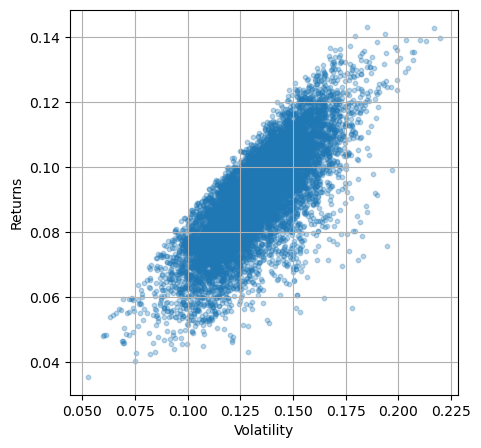

In [22]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [23]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()] 
# idxmin() gives us the minimum value in the column specified. 
min_vol_port
# For minimum volatility, the weights are assigned below:

Returns         0.035297
Volatility      0.052685
Sharpe ratio    0.480155
BCSFX weight    0.000471
CISMX weight    0.127502
FEGIX weight    0.046884
SIUSX weight    0.750914
WWWFX weight    0.074229
Name: 8794, dtype: float64

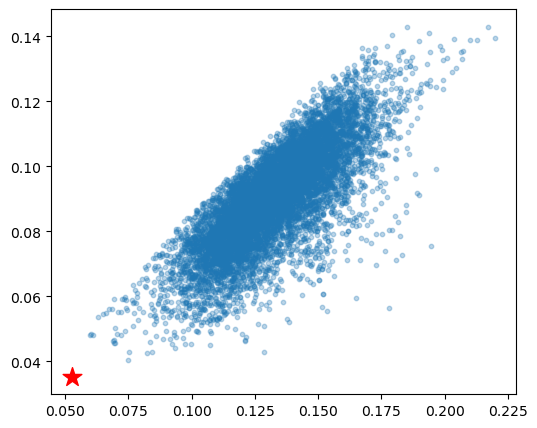

In [24]:
# plotting the minimum volatility portfolio

plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [25]:
# Finding the optimal portfolio
rf = 0.01 
# risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()] 
optimal_risky_port

Returns         0.119895
Volatility      0.142323
Sharpe ratio    0.772151
BCSFX weight    0.552139
CISMX weight    0.003706
FEGIX weight    0.024459
SIUSX weight    0.159428
WWWFX weight    0.260267
Name: 9401, dtype: float64

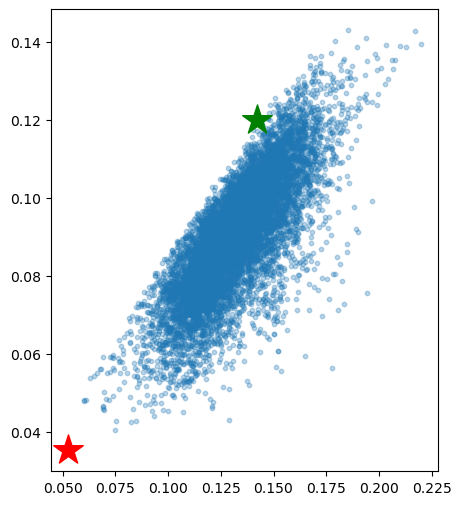

In [26]:
# Plotting optimal portfolio

plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500) 
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [28]:
port_sharpe_mean = portfolios['Sharpe ratio'].mean()
port_sharpe_mean

0.6071048098707681